In [1]:
%matplotlib notebook

In [2]:
import sys
sys.path.append('..')
import datetime

In [3]:
from pandasjsm import pandasjsm
import matplotlib.pyplot as plt
from analyzer import analyzer
import pandas as pd
import datetime

In [4]:
pj = pandasjsm("../database/")

In [5]:
df = pj.get_historical_prices("7827", start_date=datetime.date(2016,1,1))

In [6]:
analyzer.ma_deviation(df)
analyzer.momentum(df, period=25)
df.columns

Index(['open', 'high', 'low', 'close', 'adj_close', 'volume', 'MA25',
       'MA25_deviation', 'momentum25', 'signal', 'asset'],
      dtype='object')

In [12]:
df[df["adj_close"]==df["adj_close"].max()].index

DatetimeIndex(['2017-04-13'], dtype='datetime64[ns]', name='date', freq=None)

In [60]:
maxa=[]
mina=[]
for d in df.index:
    tmpdf = df[d+pd.Timedelta("1 days"):d+pd.Timedelta("30 days")]
    max = tmpdf.adj_close.max()
    if len(tmpdf)>0:
        date = tmpdf[tmpdf["adj_close"]==max].index[0]
    #print(date)
    min = tmpdf[:date]["adj_close"].min()
    print("{0},{1}".format(max,min))
    maxa.append(max)
    mina.append(min)


670,670
659,653
659,659
655,655
643,562
643,562
643,562
643,562
643,562
643,562
643,562
643,562
643,567
643,580
643,590
643,600
643,602
643,643
643,643
637,613
637,637
630,571
630,571
630,571
630,571
630,571
630,584
727,584
727,584
727,584
727,584
727,584
727,584
727,584
727,584
727,584
727,584
727,604
727,604
727,604
727,604
727,604
727,604
727,604
727,604
727,617
727,627
727,727
710,710
686,686
685,674
685,685
689,611
689,611
689,611
689,611
689,611
689,611
689,611
689,611
689,611
689,611
689,611
689,613
689,625
689,625
700,630
700,641
707,644
707,645
707,667
730,667
868,667
929,667
929,667
929,667
929,677
929,677
929,677
929,677
929,677
1040,694
1155,694
1155,700
1200,700
1200,707
1200,718
1200,718
1200,718
1200,868
1200,876
1200,876
1200,876
1200,897
1200,908
1200,908
1200,908
1200,908
1200,910
1200,978
1200,1040
1200,1122
1200,1122
1200,1122
1200,1141
1200,1200
1190,1190
1011,1011
979,979
917,900
917,905
917,917
906,772
920,772
920,772
920,772
920,818
920,827
920,827
920,827
920,8

In [62]:
df["max"]=maxa
df.max/=df.adj_close
df["min"]=mina
df.min=

<IPython.core.display.Javascript object>


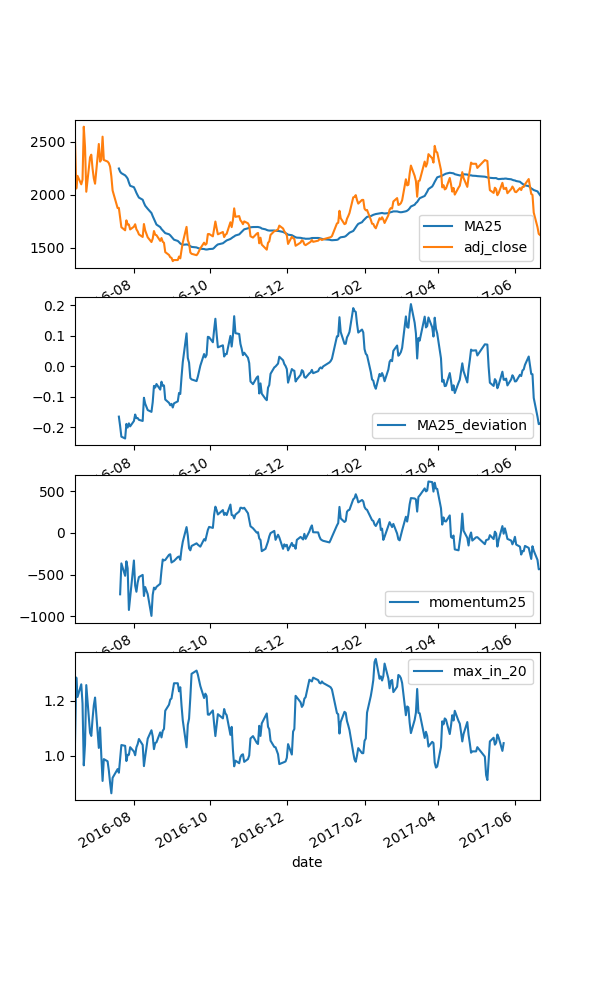

In [31]:
fig, [ax1, ax2, ax3, ax4] = plt.subplots(4,1,figsize=(6,10))
# df2=df["2013-05-21":"2013-06-07"]
# fig, [ax1, ax2] = plt.subplots(2,1)
df.plot(ax = ax1, y=["MA25",'adj_close'])
df.plot(ax = ax2, y=["MA25_deviation"])
df.plot(ax = ax3, y=["momentum25"])
df.plot(ax = ax4, y=["max_in_20"])

C:\Users\Takeo\Anaconda3\envs\stock\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<IPython.core.display.Javascript object>


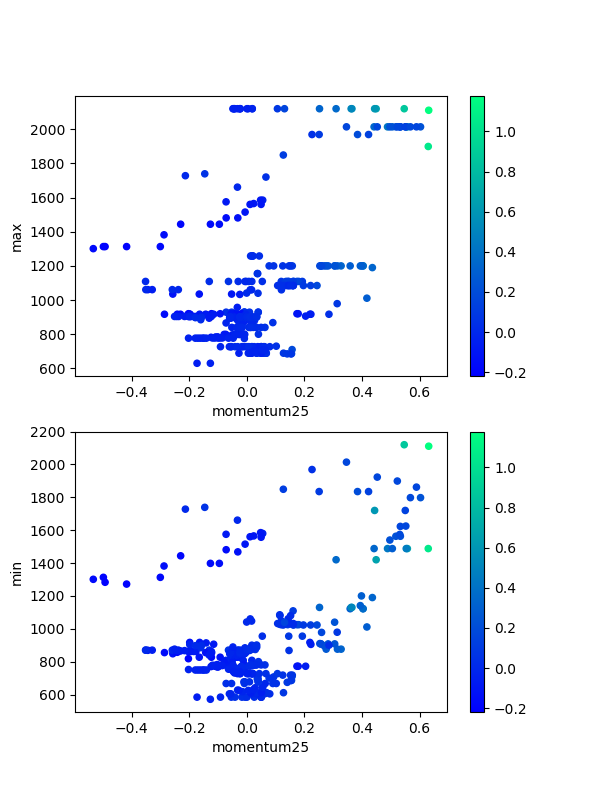

C:\Users\Takeo\Anaconda3\envs\stock\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [63]:
df2 = df["2016-01-01":]
df2["c"] = df2["MA25_deviation"]
fig, [ax1, ax2] = plt.subplots(2,1,figsize=(6,8))
df2["momentum25"] = df2["momentum25"] / df2["adj_close"]
df2.plot(ax=ax1, kind='scatter', x="momentum25", y="max", c=df2.c, cmap="winter")
df2.plot(ax=ax2, kind='scatter', x="momentum25", y="min", c=df2.c, cmap="winter")
#df.plot(kind='scatter', x="momentum", y="25MA_deviation", c=df.c, cmap="winter")

In [47]:
import talib as ta
df["momentum25_2"] = ta.MOM(df["momentum25"].values,5)

<IPython.core.display.Javascript object>


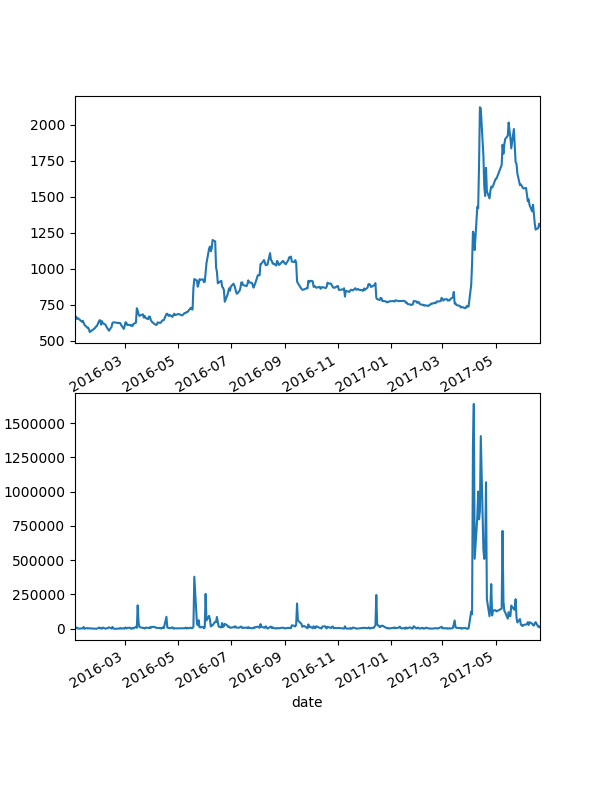

In [44]:
#df2 = df["2016-01-01":]
#df2["c"] = df2["MA25_deviation"]
fig, [ax1, ax2] = plt.subplots(2,1,figsize=(6,8))
df["adj_close"].plot(ax=ax1)
df["volume"].plot(ax=ax2)

In [43]:
df2["2017-06-21":]["momentum25"]

date
2017-06-21   -0.504228
Name: momentum25, dtype: float64

In [50]:
df.tail(1).momentum25

date
2017-06-21   -656.0
Name: momentum25, dtype: float64